# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()


In [28]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names
dataset = iris_data
def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df.columns = [i.strip(" (cm)") for i in df.columns.tolist()]
    df['target'] = dataset.target
    df['class'] = dataset.target_names[dataset.target]
    return df
df_iris = create_df()
# df_iris.sample(n=10)
df_iris.sample(n=10)
varieties = list(df_iris.pop('class'))

In [12]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [22]:

#From our data we will only get variable columns as np.array
x = df_iris.drop(['class', 'target'], axis=1).values
# YOUR CODE HERE
x.shape

(150, 4)

In [23]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [24]:
mergings = linkage(x, method='complete')
# YOUR CODE HERE


In [25]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

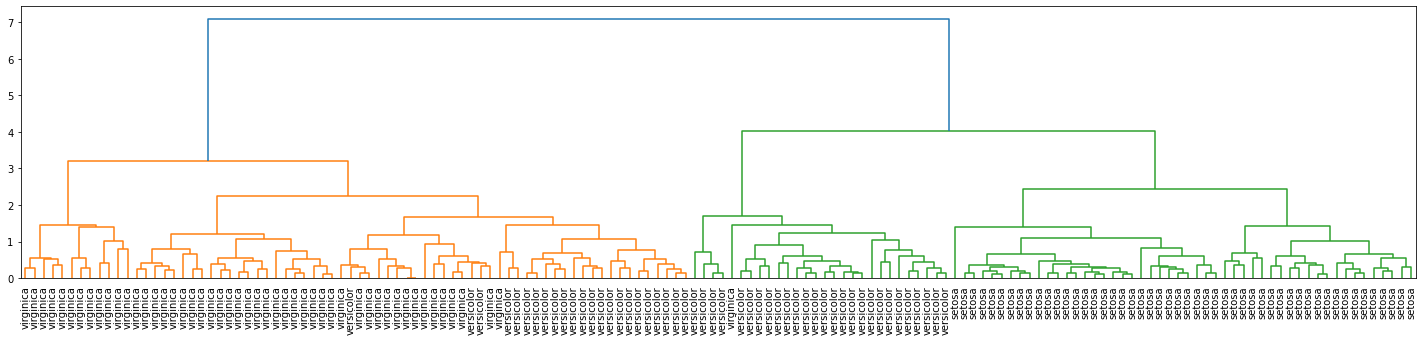

In [32]:
plt.figure(figsize=(25, 5))
dn = dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=10)
# YOUR CODE HERE
plt.show()

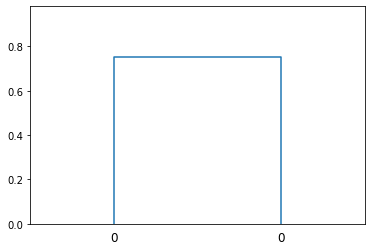

In [33]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [36]:
from sklearn.cluster import KMeans

df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Strive repos\strive_practice\02. Clustering\01. Partitional Algorithms\datasets\ch1ex1.csv')
points = df.values

new_df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Strive repos\strive_practice\02. Clustering\01. Partitional Algorithms\datasets\ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [37]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)

In [38]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [40]:
# YOUR CODE HERE
fitted = model.fit(points)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [73]:
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

In [57]:
# YOUR CODE HERE
labels = fitted.predict(points)

In [42]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [77]:
labels.shape[0]

300

In [79]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for label in range(labels.shape[0]):
        if labels[label] == 0:
            data_0.append(points[label])
        elif labels[label] == 1:
            data_1.append(points[label]) 
        else:
            data_2.append(points[label])
    data_0, data_1, data_2 = np.array(data_0), np.array(data_1), np.array(data_2)
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95, 2)
(94, 2)
(111, 2)


In [80]:
print(data_0)

[[-1.52901547 -0.42953079]
 [-1.80110088 -0.31861296]
 [-1.63567888 -0.02859535]
 [-1.61925804 -0.47983949]
 [-1.84329582 -0.16694431]
 [-1.68576139  0.10686728]
 [-1.56478322 -0.84675394]
 [-1.43386366 -0.2381297 ]
 [-1.58567922  0.08499354]
 [-2.19680359  0.49473677]
 [-1.2107308  -0.34924109]
 [-1.8356219  -0.04839732]
 [-1.48970175 -0.19299604]
 [-2.0521341  -0.02129125]
 [-1.59227759 -0.17374038]
 [-1.47344152 -0.02202853]
 [-1.35514704  0.22971067]
 [-1.43590032 -0.56384446]
 [-1.5137129  -0.83914323]
 [-1.97233903 -0.41155375]
 [-1.87663382  0.14745773]
 [-1.37481454  0.28428395]
 [-1.80564029 -0.96710574]
 [-1.68489862 -0.30564595]
 [-1.21795929 -0.20219674]
 [-1.05182747 -0.01062376]
 [-1.50219748 -0.52308922]
 [-1.72717293 -0.46173916]
 [-1.60995631 -0.1821007 ]
 [-1.09111021 -0.0781398 ]
 [-1.33328681 -0.30001937]
 [-1.14829098 -0.30400762]
 [-1.93467327  0.30572472]
 [-1.57761893 -0.27726365]
 [-1.65237509 -0.6803981 ]
 [-1.89607082 -0.70085502]
 [-1.61158505  0.22805725]
 

In [51]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

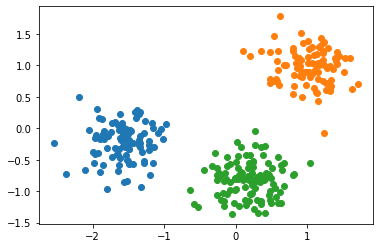

In [81]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(x=data_0[:, 0], y=data_0[:, 1])
plt.scatter(x=data_1[:, 0], y=data_1[:, 1])
plt.scatter(x=data_2[:, 0], y=data_2[:, 1])

plt.show()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [62]:

# YOUR CODE HERE
new_labels = model.predict(new_points)

In [63]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [82]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
def separate_labels(new_labels, points):
    new_0 = []
    new_1 = []
    new_2 = []

    # YOUR CODE HERE
    for label in range(new_labels.shape[0]):
        if new_labels[label] == 0:
            new_0.append(points[label])
        elif new_labels[label] == 1:
            new_1.append(points[label]) 
        else:
            new_2.append(points[label])
    new_0, new_1, new_2 = np.array(new_0), np.array(data_1), np.array(new_2)
    return new_0,new_1,new_2


new_0,new_1,new_2 =separate_labels(new_labels, points)



In [65]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

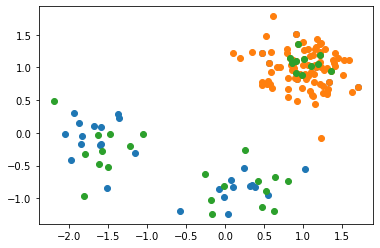

In [83]:
#plot the new labels

plt.scatter(x=new_0[:, 0], y=new_0[:, 1])
plt.scatter(x=new_1[:, 0], y=new_1[:, 1])
plt.scatter(x=new_2[:, 0], y=new_2[:, 1])

plt.show()
# YOUR CODE HERE


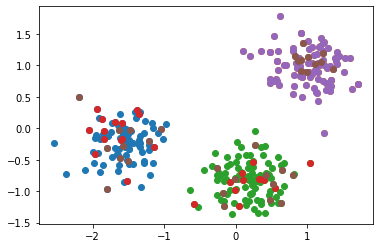

In [84]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(x=data_0[:, 0], y=data_0[:, 1])
plt.scatter(x=data_1[:, 0], y=data_1[:, 1])
plt.scatter(x=data_2[:, 0], y=data_2[:, 1])
plt.scatter(x=new_0[:, 0], y=new_0[:, 1])
plt.scatter(x=new_1[:, 0], y=new_1[:, 1])
plt.scatter(x=new_2[:, 0], y=new_2[:, 1])
plt.show()